In [1]:
#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix,precision_score,jaccard_score,recall_score,f1_score,accuracy_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
import os
from warnings import filterwarnings
import warnings
warnings.filterwarnings("ignore")
os.environ["PYTHONWARNINGS"] = "ignore"

In [2]:
#Creating DataFrame :

data = pd.read_csv("/kaggle/input//mobile-price-classification/train.csv")

In [3]:
df = pd.DataFrame(data)
df

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2  ...         20       756  2549     9     7   
1       0.7        136        3  ...        905      1988  2631    17     3   
2       0.9        145        5  ...       1263      1716  2603    11     2   
3       0.8        131        6  ...       1216      1786  2769    16     8   
4       0.6        141        2  ...       1208      1212  1411     8     2   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
...         ...      ...           ...   ...          ...  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[2000 rows x 21 columns]

In [4]:
#Sorting values by our target

df.sort_values(by='price_range' , inplace = True)

In [5]:
#Cheching for duplicated values :

print(len(df[df.duplicated()]))

0


In [6]:
#Checking for NANs :

df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 1838 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_scre

In [8]:
df.describe().T

count        mean          std    min      25%     50%  \
battery_power  2000.0  1238.51850   439.418206  501.0   851.75  1226.0   
blue           2000.0     0.49500     0.500100    0.0     0.00     0.0   
clock_speed    2000.0     1.52225     0.816004    0.5     0.70     1.5   
dual_sim       2000.0     0.50950     0.500035    0.0     0.00     1.0   
fc             2000.0     4.30950     4.341444    0.0     1.00     3.0   
four_g         2000.0     0.52150     0.499662    0.0     0.00     1.0   
int_memory     2000.0    32.04650    18.145715    2.0    16.00    32.0   
m_dep          2000.0     0.50175     0.288416    0.1     0.20     0.5   
mobile_wt      2000.0   140.24900    35.399655   80.0   109.00   141.0   
n_cores        2000.0     4.52050     2.287837    1.0     3.00     4.0   
pc             2000.0     9.91650     6.064315    0.0     5.00    10.0   
px_height      2000.0   645.10800   443.780811    0.0   282.75   564.0   
px_width       2000.0  1251.51550   432.199447  500.0   874.75  1247.0   
ram            2000.0  2124.21300  1084.732044  256.0  1207.50  2146.5   
sc_h           2000.0    12.30650     4.213245    5.0     9.00    12.0   
sc_w           2000.0     5.76700     4.356398    0.0     2.00     5.0   
talk_time      2000.0    11.01100     5.463955    2.0     6.00    11.0   
three_g        2000.0     0.76150     0.426273    0.0     1.00     1.0   
touch_screen   2000.0     0.50300     0.500116    0.0     0.00     1.0   
wifi           2000.0     0.50700     0.500076    0.0     0.00     1.0   
price_range    2000.0     1.50000     1.118314    0.0     0.75     1.5   

                   75%     max  
battery_power  1615.25  1998.0  
blue              1.00     1.0  
clock_speed       2.20     3.0  
dual_sim          1.00     1.0  
fc                7.00    19.0  
four_g            1.00     1.0  
int_memory       48.00    64.0  
m_dep             0.80     1.0  
mobile_wt       170.00   200.0  
n_cores           7.00     8.0  
pc               15.00    20.0  
px_height       947.25  1960.0  
px_width       1633.00  1998.0  
ram            3064.50  3998.0  
sc_h             16.00    19.0  
sc_w              9.00    18.0  
talk_time        16.00    20.0  
three_g           1.00     1.0  
touch_screen      1.00     1.0  
wifi              1.00     1.0  
price_range       2.25     3.0

In [9]:
df.nunique()   

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [10]:
#Seperating discrete and continuous columns :

discrete = ['blue' ,'dual_sim' , 'four_g' , 'three_g' , 'touch_screen' , 'wifi' , 'n_cores']
continuous = ['battery_power' , 'clock_speed' , 'fc', 'n_cores', 'int_memory' , 'mobile_wt', 'm_dep' , 'px_height' , 'px_width' , 'ram' ,
             'talk_time' , 'pc' , 'sc_h' , 'sc_w']

#using for better visualization
continuous1 =  ['battery_power' , 'px_height' , 'px_width' , 'ram']
continuous2 = ['clock_speed' , 'fc', 'n_cores', 'int_memory' , 'mobile_wt', 'm_dep', 'talk_time' , 'pc' , 'sc_h' , 'sc_w']

In [11]:
#Values of discrete columns :

for i in discrete :
    
    uniques = df[i].unique()
    sorted_unique = np.sort(uniques)
    print(f' {i} : {sorted_unique}')

 blue : [0 1]
 dual_sim : [0 1]
 four_g : [0 1]
 three_g : [0 1]
 touch_screen : [0 1]
 wifi : [0 1]
 n_cores : [1 2 3 4 5 6 7 8]


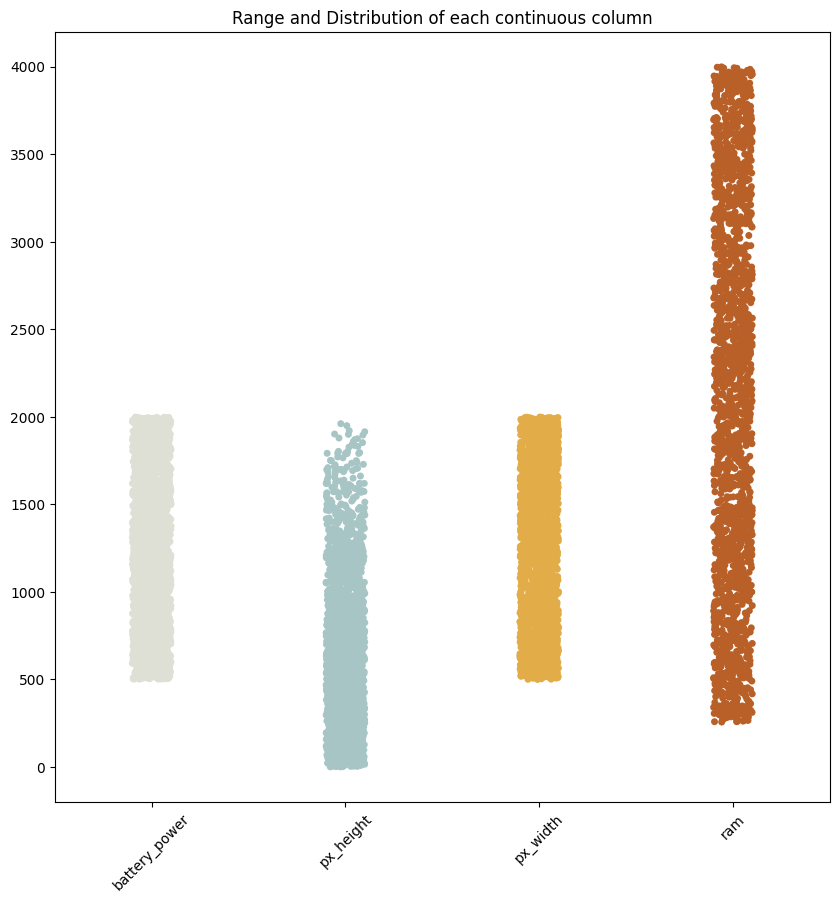

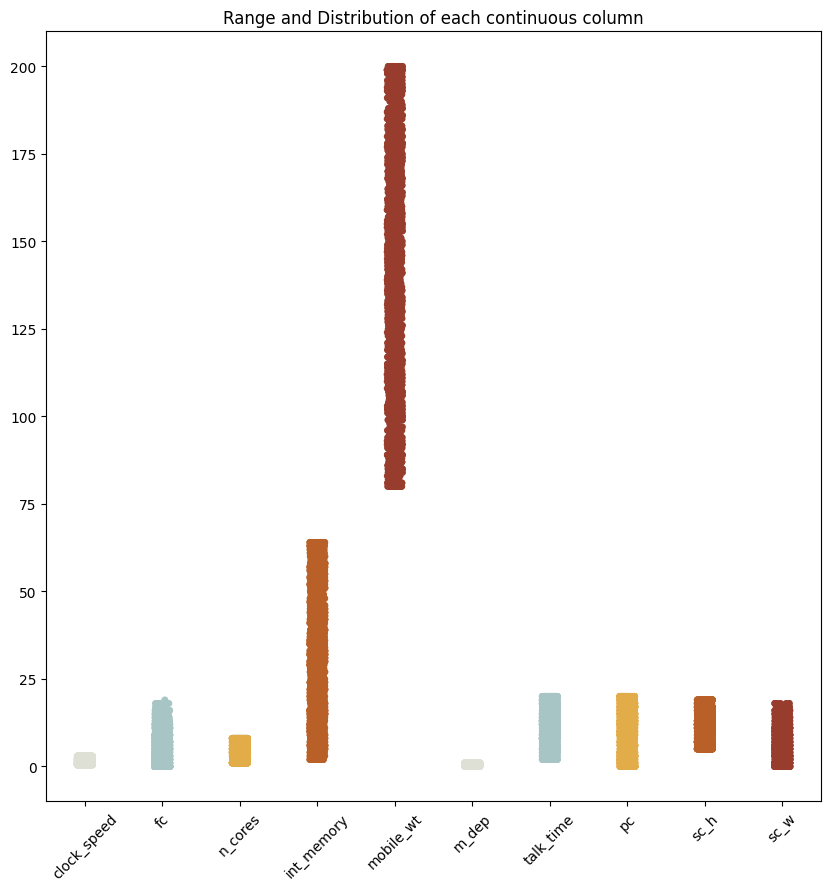

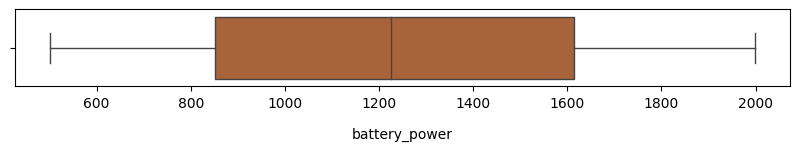

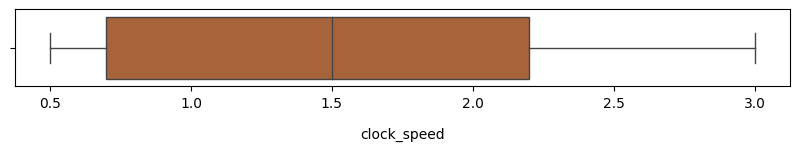

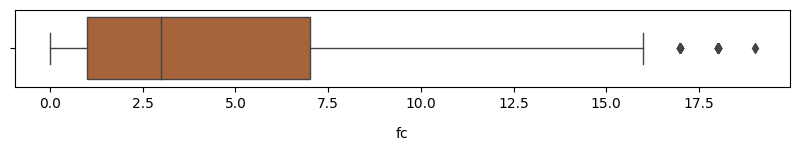

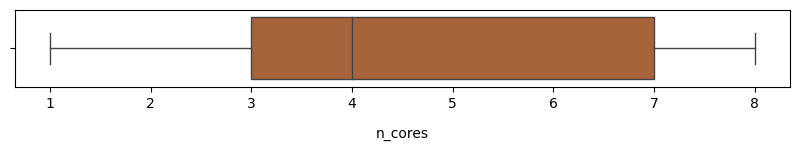

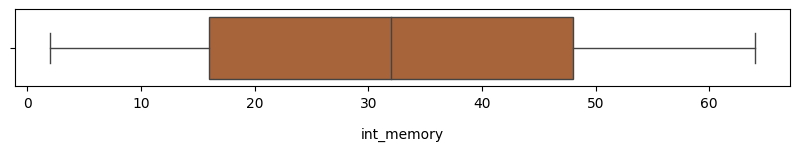

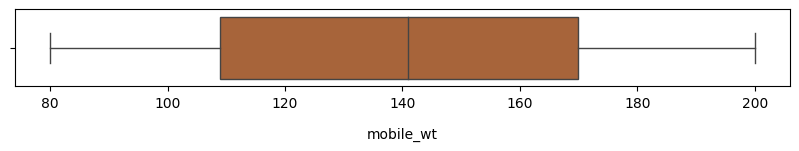

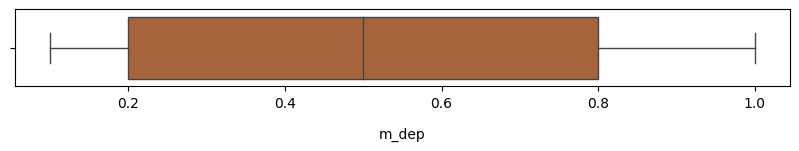

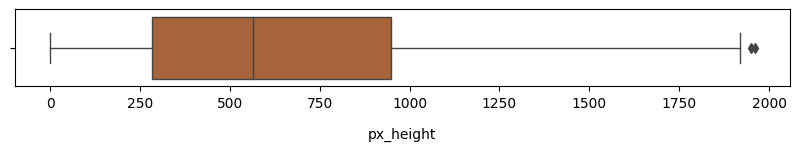

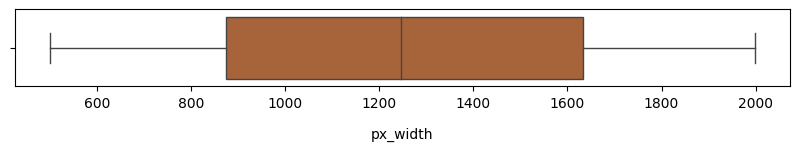

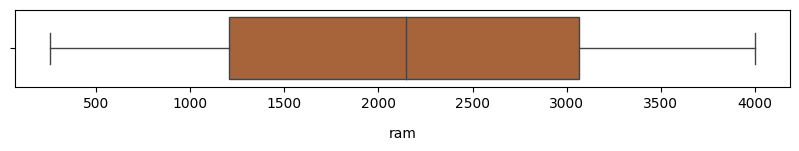

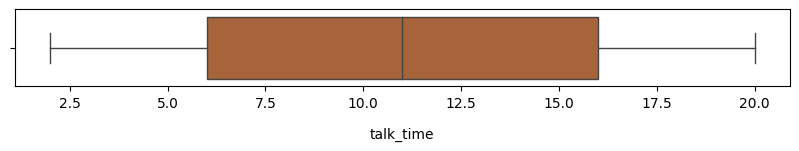

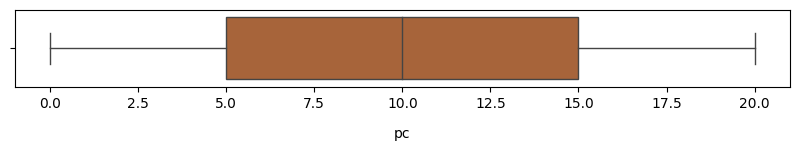

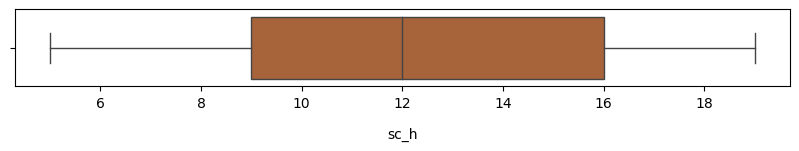

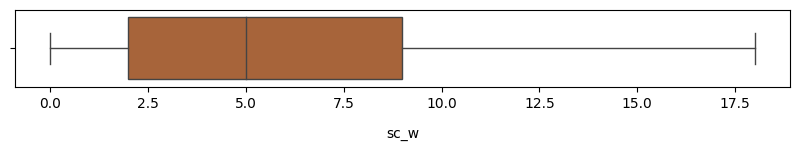

In [12]:
# Checking for noise in continuous columns :

palette = ['#DEE0D5' ,'#A7C5C5' ,  '#E2AC48' , '#B96028' , '#983C2D']

#Ploting distribution and range of each column
plt.figure(figsize = (10,10))
plt.title("Range and Distribution of each continuous column")
plt.xticks(rotation=45)
df_cont1 = df[continuous1]
sns.stripplot( data = df_cont1  , palette= palette )
plt.show()

print('\n')

plt.figure(figsize = (10,10))
plt.title("Range and Distribution of each continuous column")
plt.xticks(rotation=45)
df_cont2 = df[continuous2]
sns.stripplot( data = df_cont2  , palette = palette )
plt.show()

print('\n'*2)

#Box-plot of each column
for i in continuous :
    plt.figure(figsize = (10,1))
    sns.boxplot(x = df[i] , color = '#B96028' , linewidth = 1)
    plt.xlabel(i, labelpad = 12)
    plt.show()
    print('\n'*1)

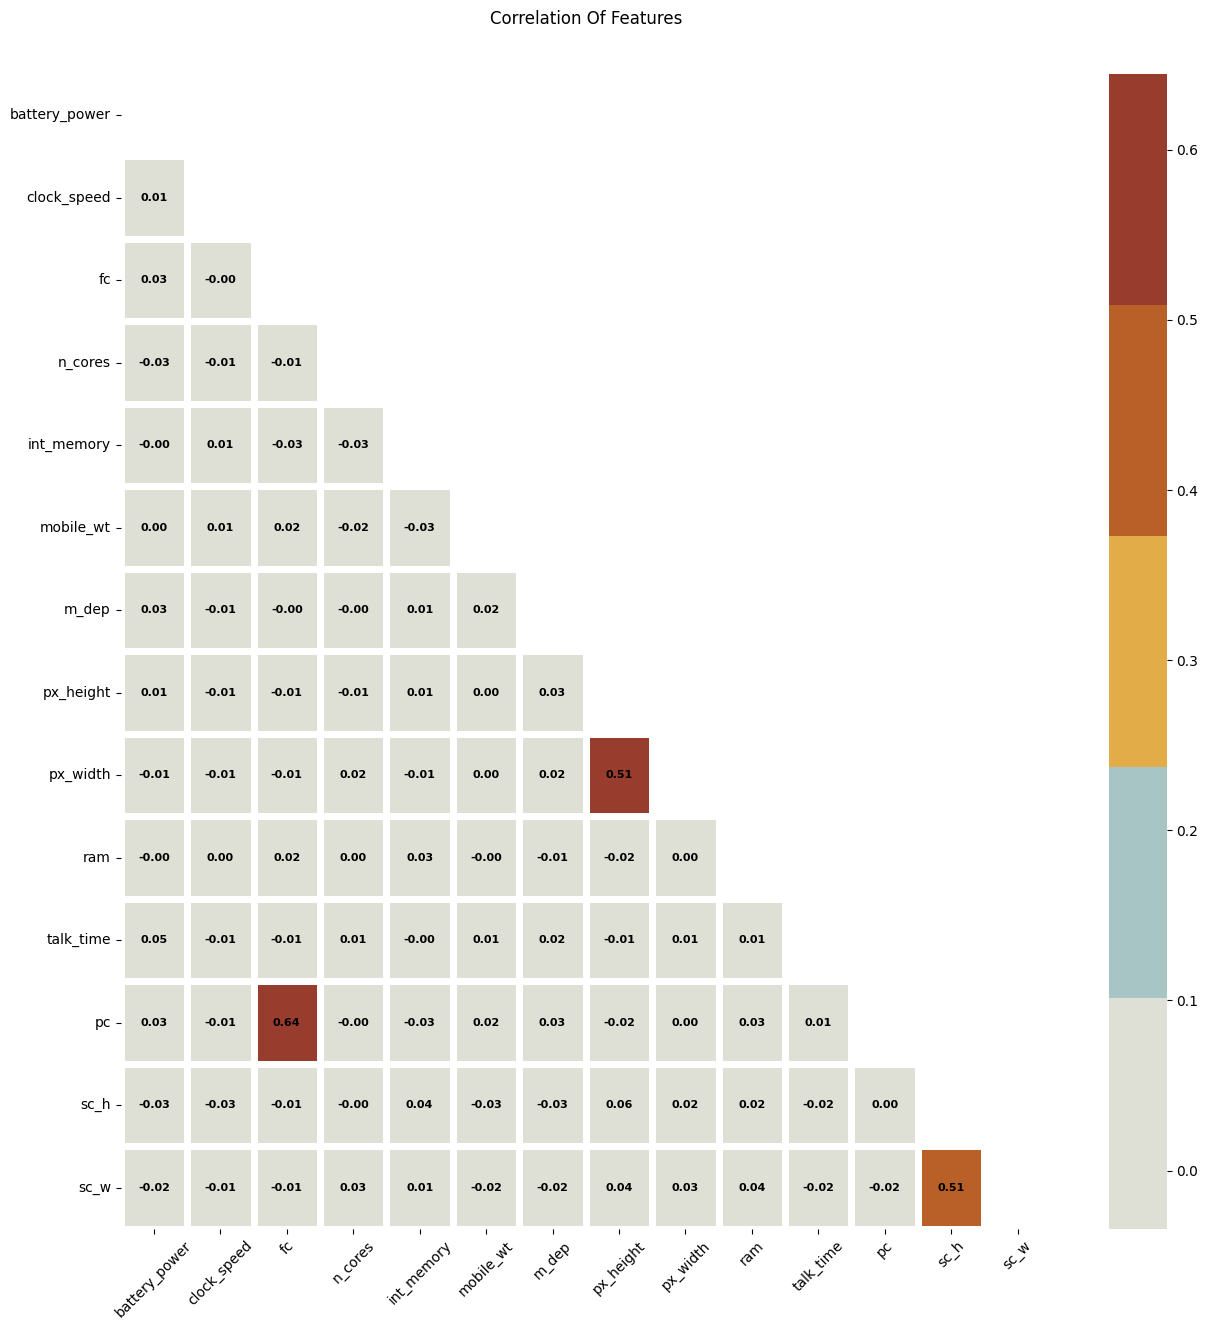

In [13]:
#Correlations between continuous features

corr_matrix = df[continuous].corr() 
mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) #Mask the value under the diagonal



plt.figure(figsize=(15,15)) #Plotting the correlation map
colormap = ['#DEE0D5' ,'#A7C5C5' ,  '#E2AC48' , '#B96028' , '#983C2D']
#colormap = ['#d80032'   , '#edf2f4' , '#ef233c' , '#d80032' , '#8d99ae' , '#2b2d42']
# colormap.reverse()
sns.heatmap(corr_matrix , cmap = colormap , annot = True , linewidths = 5 , mask = mask , fmt = ".2f" , annot_kws={"size": 8, "weight": "bold", "color": "black"})
plt.title("Correlation Of Features\n\n" )
plt.xticks(rotation = 45)
plt.yticks(rotation = 360)
plt.show()

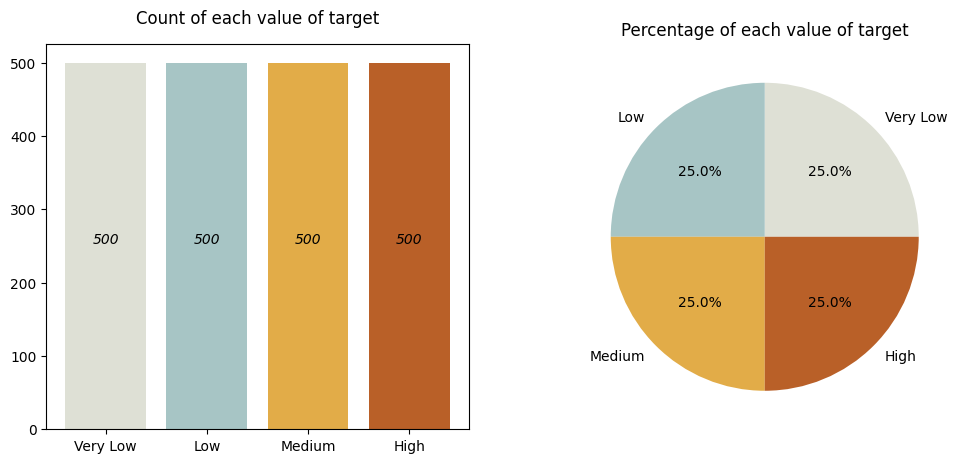

In [14]:
#Checking target distribution :

#Counnting number of each value
plt.figure(figsize = (12 , 5))
count = df['price_range'].value_counts()
plt.subplot(1, 2, 1, facecolor = '#0000')
plt.title("Count of each value of target" , pad = 15)

plt.bar(['Very Low' , 'Low' , 'Medium' , 'High' ] , count.values, color = ['#DEE0D5' ,'#A7C5C5' ,  '#E2AC48' , '#B96028' , '#983C2D']) #Creating a bar plot

for i , v in enumerate(count):
        plt.text(i , v/2 , str(v) , ha='center', va='bottom', fontstyle = "oblique" , fontsize=10) #Putting each bar number on the top

#Pie plot for percentage        
plt.subplot(1,2,2,facecolor = '#edf2f4')
plt.title('Percentage of each value of target')
plt.pie([df['price_range'].value_counts()[0] , df['price_range'].value_counts()[1] , df['price_range'].value_counts()[2] ,
         df['price_range'].value_counts()[3]] , 
    labels=['Very Low' , 'Low' , 'Medium' , 'High'] , autopct='%1.1f%%' , colors = ['#DEE0D5' ,'#A7C5C5' ,  '#E2AC48' , '#B96028' , '#983C2D'])

plt.show()

In [15]:
#Seperating data by different target value

df_very_low = df[df['price_range'] == 0]
df_low = df[df['price_range'] == 1]
df_medium = df[df['price_range'] == 2]
df_high = df[df['price_range'] == 3]

df['price_range'] = df['price_range'].astype(str) #For the sake of plotting

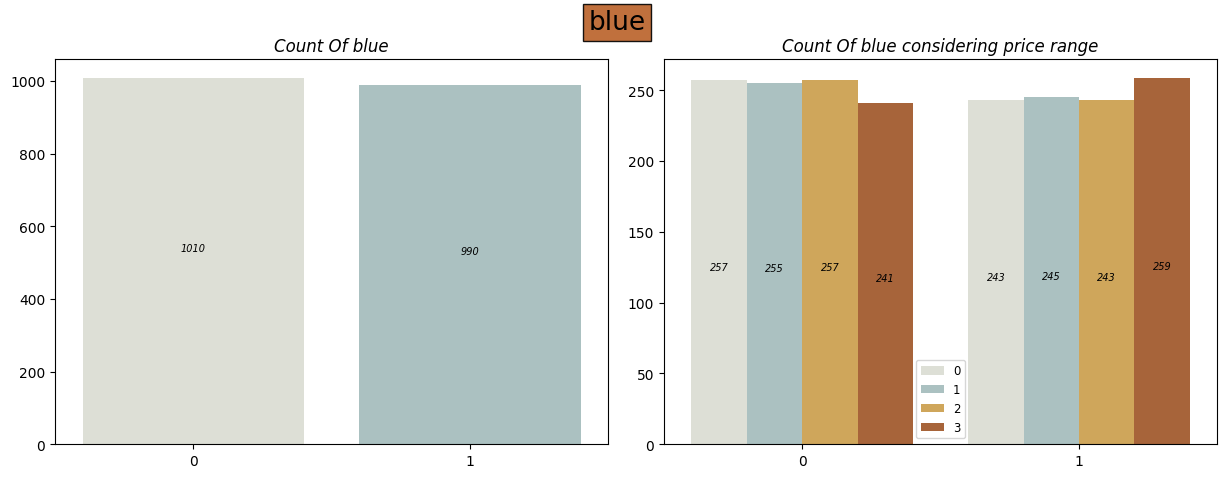

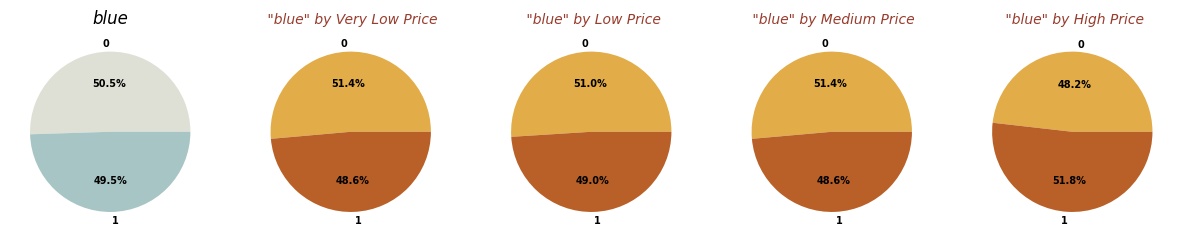

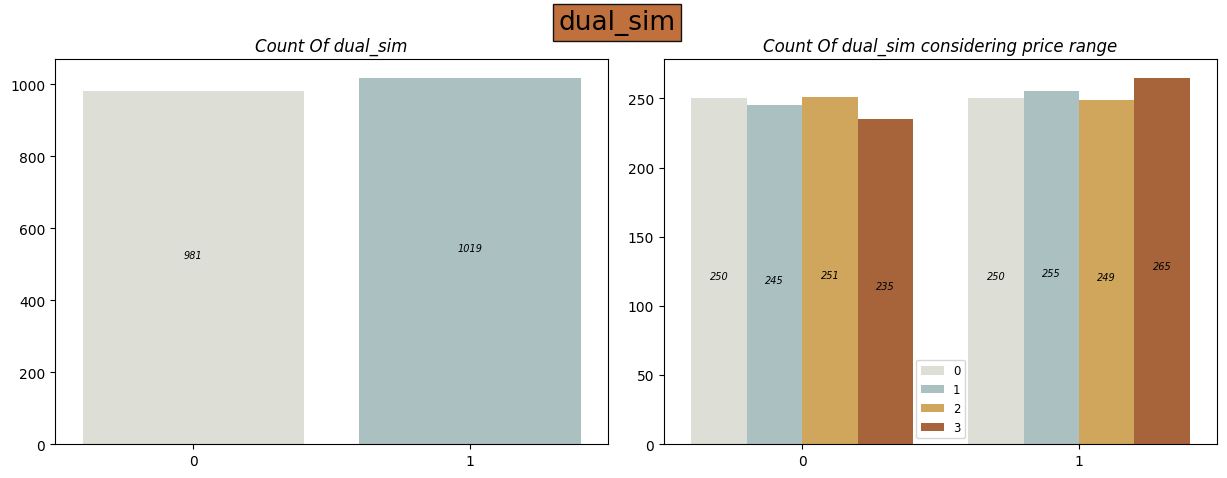

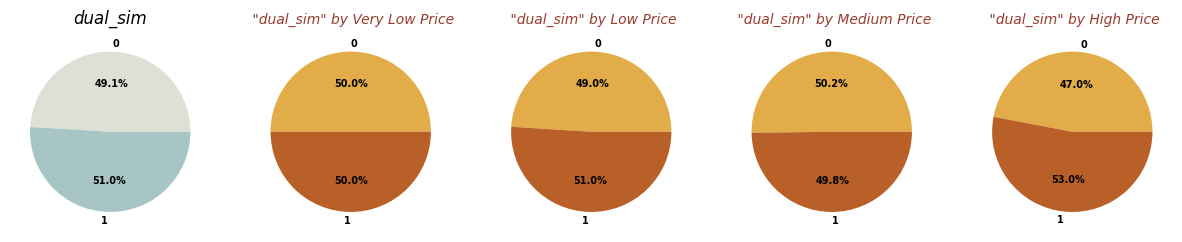

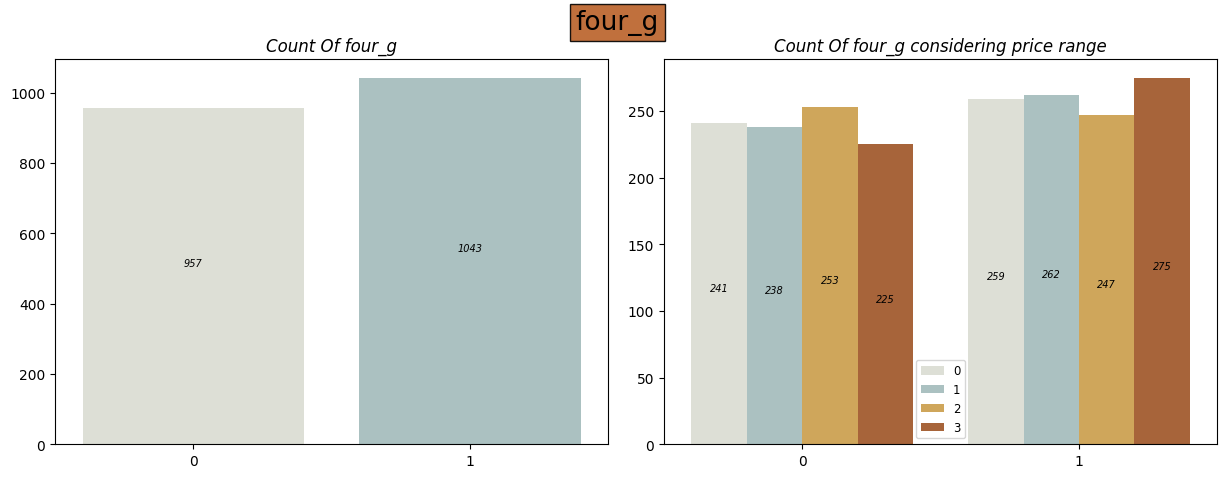

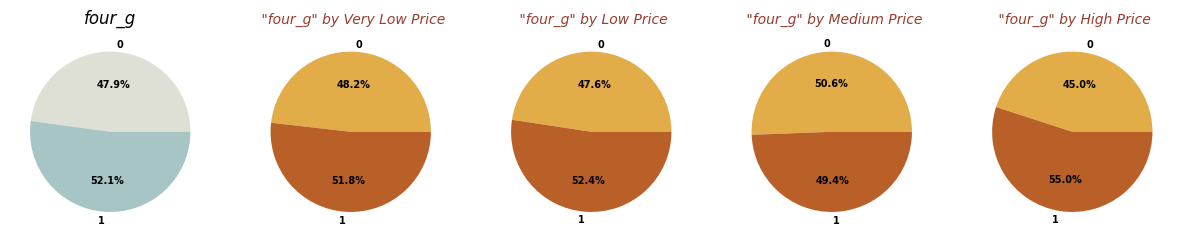

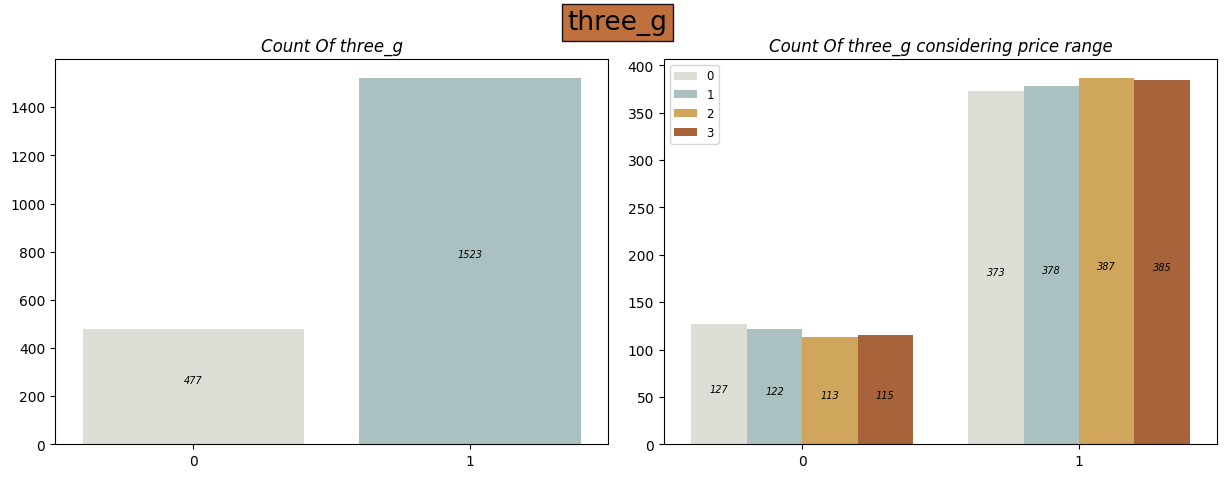

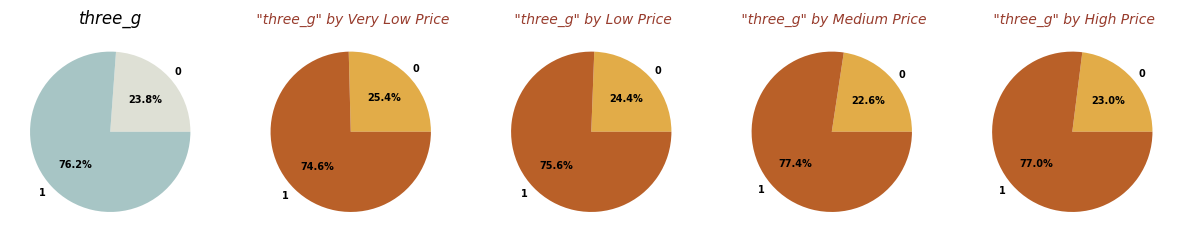

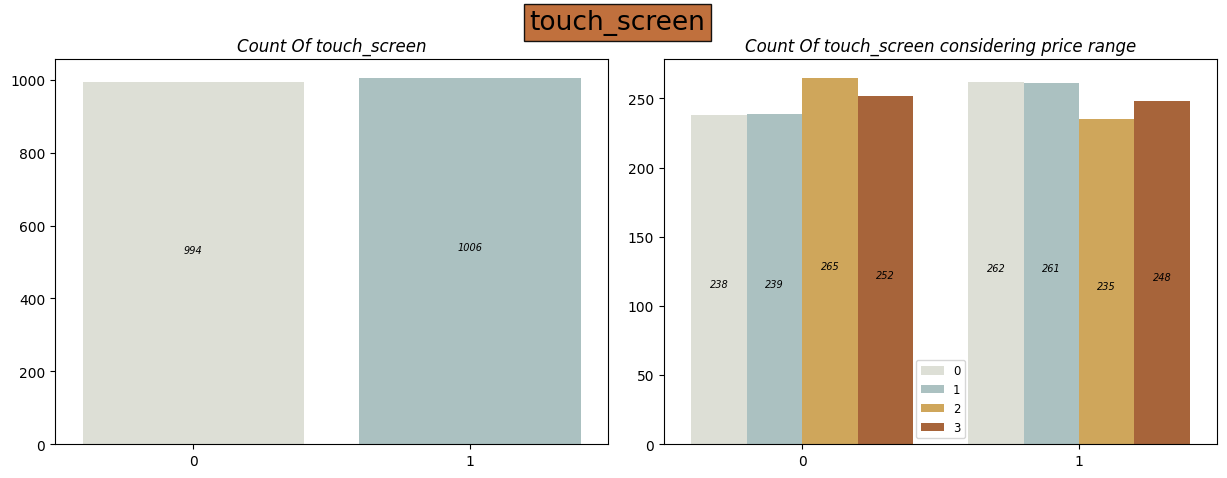

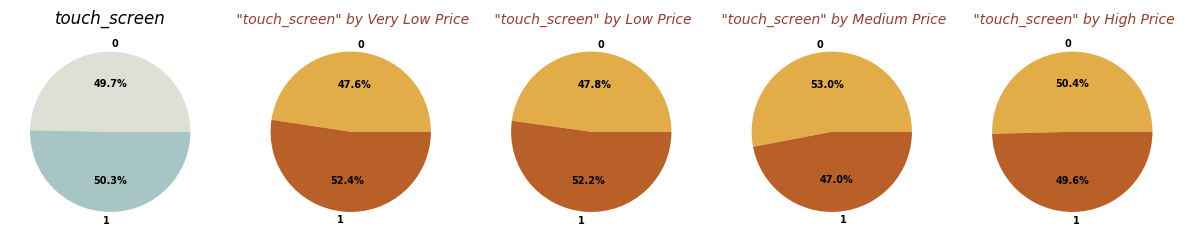

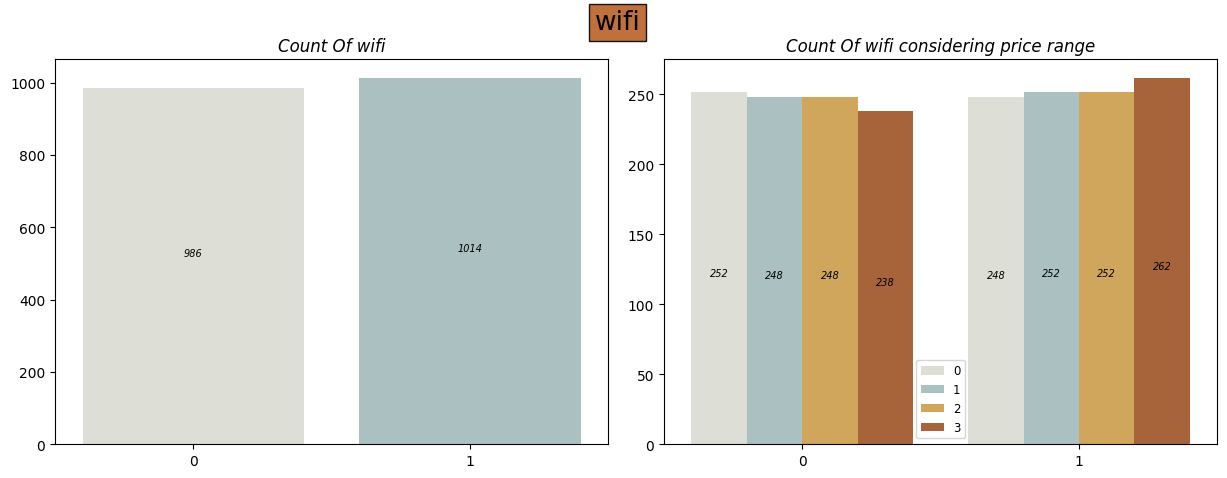

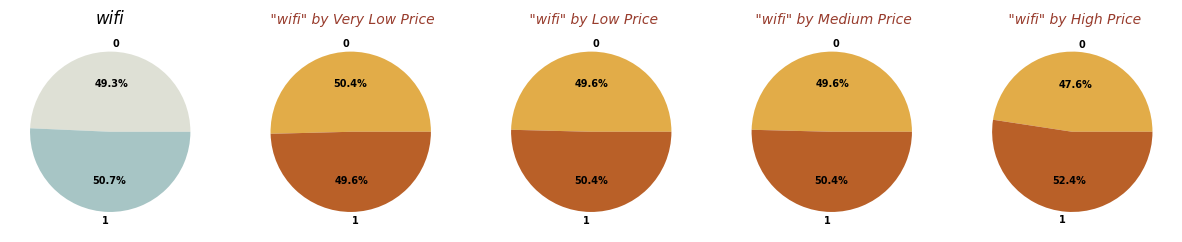

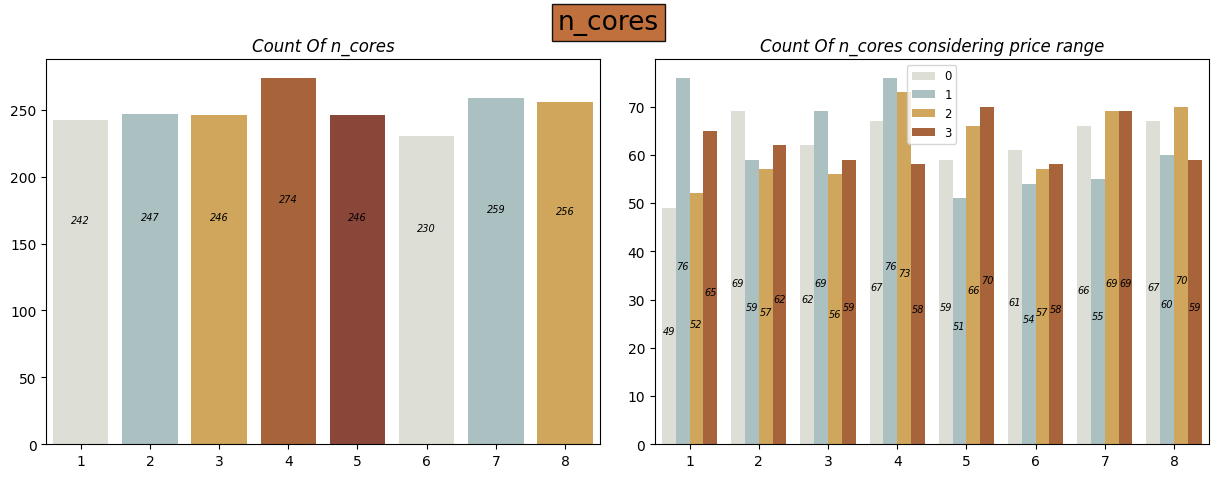

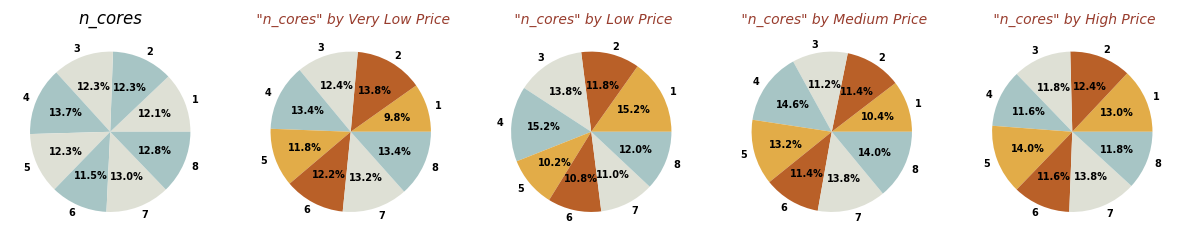

In [16]:
#Plotting the count of each discrete column in general and also considering target(price_range) :

for col in discrete : #a loop for each feature(column)
    
    plt.figure(figsize = (15 , 5))
    plt.suptitle(col, fontsize=19 , bbox=dict(facecolor='#B96028', alpha=0.9))


    count = df[col].value_counts() #value count of the feature
    count.sort_index(inplace = True)
    
    count_very_low = df_very_low[col].value_counts() #Count of very low price
    count_very_low.sort_index(inplace = True)
    
    count_low = df_low[col].value_counts() #Count of low price
    count_low.sort_index(inplace = True)
    
    count_medium = df_medium[col].value_counts() #Count of medium price
    count_medium.sort_index(inplace = True)
    
    count_high = df_high[col].value_counts() #Count of high price
    count_high.sort_index(inplace = True)
    
    #Plotting the first count plot(counting the value of each feature)
    plt.subplot(1,2, 1 , facecolor = 'white' )
    sns.countplot(data = df, x = col , 
                  palette = ['#DEE0D5' ,'#A7C5C5' ,  '#E2AC48' , '#B96028' , '#983C2D']) #Plottting 
    plt.title(f"Count Of {col}" ,fontsize = 12 , fontstyle = "oblique")
    plt.xlabel("") 
    plt.ylabel("")
    
    for i , v in enumerate(count): #Putting the value of each bar on the top of it
        plt.text(i , v/2 + 50 , str(v) , ha='center', va='top', 
                 fontstyle = "oblique" , fontsize=7 , color = 'black') 
        
    
    #Plotting the second count plot(counting the value of each feature considering our target 'price_range')
    plt.subplot(1,2, 2 , facecolor = 'white' )
    sns.countplot(data = df , x=col , 
                  palette = ['#DEE0D5' ,'#A7C5C5' ,  '#E2AC48' , '#B96028' , '#983C2D'], 
                  hue = 'price_range')
    plt.title(f'Count Of {col} considering price range' , fontsize = 12 , fontstyle = "oblique")
    plt.xlabel("") 
    plt.ylabel("")
    
    for i , v in enumerate(count_very_low): #Putting the value of each bar on the top of it
        plt.text(i-0.3 , v/2 , str(v) , ha='center', va='top', 
                 fontstyle = "oblique" , fontsize=7, color = 'black') 
    
    for i , v in enumerate(count_low): #Putting the value of each bar on the top of it
        plt.text(i-0.1 , v/2 , str(v) , ha='center', va='top', 
                 fontstyle = "oblique" , fontsize=7, color = 'black') 
    
    for i , v in enumerate(count_medium): #Putting the value of each bar on the top of it
        plt.text(i+0.1 , v/2 , str(v) , ha='center', va='top', 
                 fontstyle = "oblique" , fontsize=7, color = 'black') 
    
    for i , v in enumerate(count_high): #Putting the value of each bar on the top of it
        plt.text(i+0.3 , v/2 , str(v) , ha='center', va='top', 
                 fontstyle = "oblique" , fontsize=7, color = 'black') 
    
    plt.legend(fontsize='small')
    plt.subplots_adjust(wspace= 0.1 , hspace = 0.5) #space between subplots
    plt.show()

    #plotting the pie charts
    plt.figure(figsize = (15 , 5))
    price_dict = {'Very Low Price' : count_very_low , 'Low Price' : count_low , 'Medium Price' : count_medium ,
                 'High Price' : count_high} #a dictionary for plotting the pie charts considering 'price_range'
    
    #General pie plot
    plt.subplot(1 , 5 , 1 , facecolor = 'white')
    plt.pie(count.tolist() ,  textprops={'fontsize': 7, 'fontweight': 'bold' } , 
        labels = count.index ,  autopct='%1.1f%%' , colors = ['#DEE0D5' ,'#A7C5C5'])
    plt.title(col ,fontsize=12 , fontstyle = "oblique")
    
    for n , price_range in enumerate(price_dict):
        plt.subplot(1 , 5 , n+2 , facecolor = 'white')
        plt.pie(price_dict[price_range].tolist() ,  textprops={'fontsize': 7 , 'fontweight': 'bold' } , 
        labels = price_dict[price_range].index ,  autopct='%1.1f%%' , colors = ['#E2AC48' , '#B96028' , '#DEE0D5' ,'#A7C5C5'])
        plt.title(f' "{col}" by {price_range}' , fontsize=10 , fontstyle = "oblique" , color = '#983C2D')

    
    plt.show()
    print('\n' * 2)

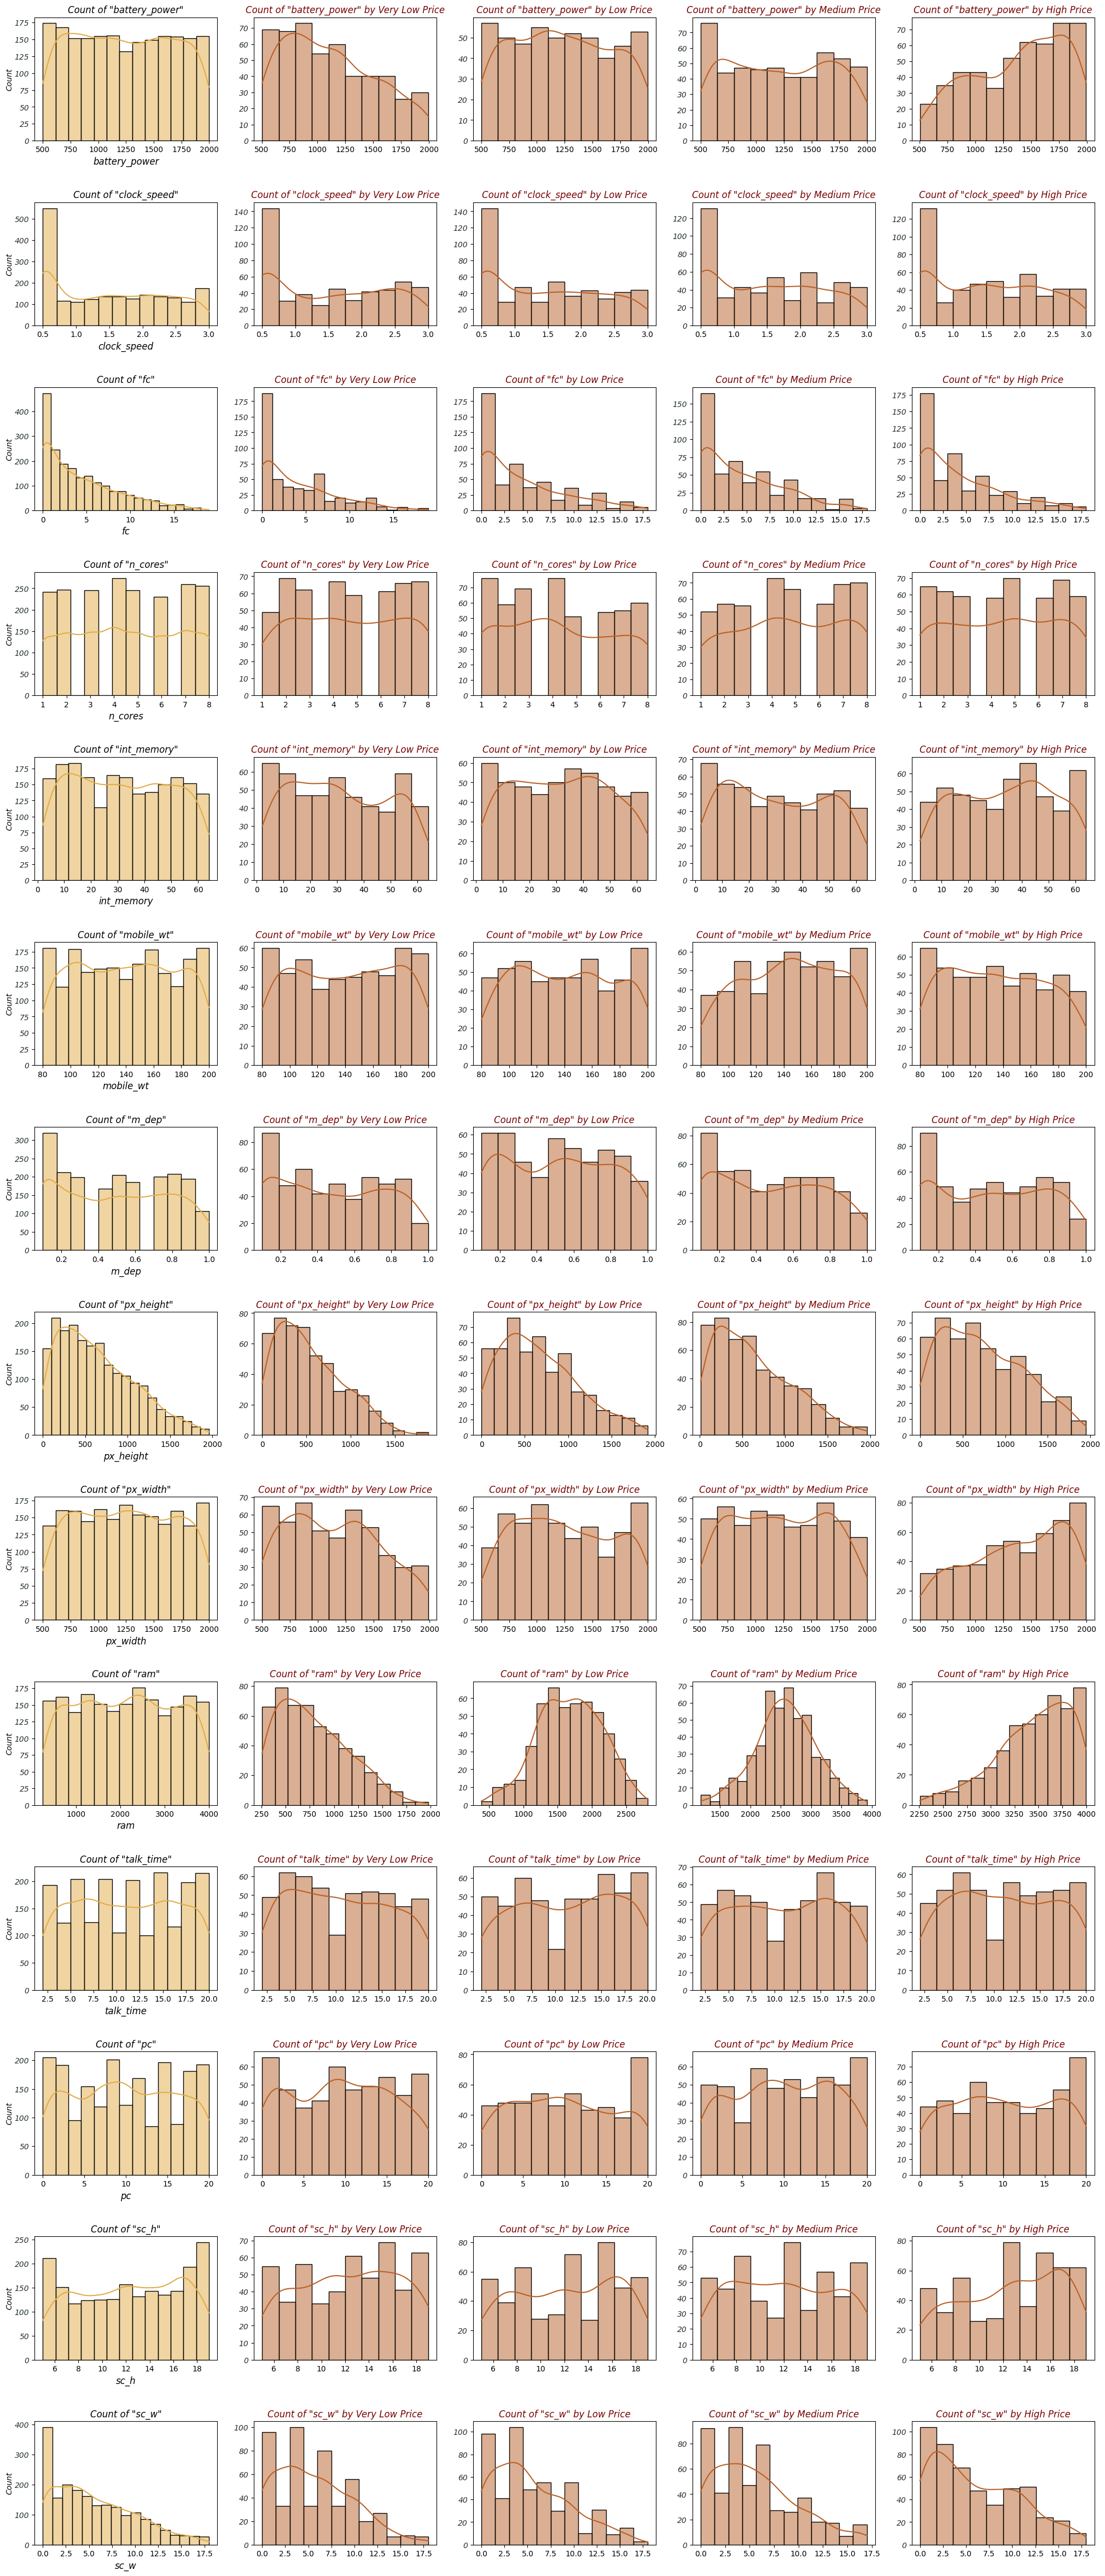

---------------------------------Distribution Plots---------------------------------


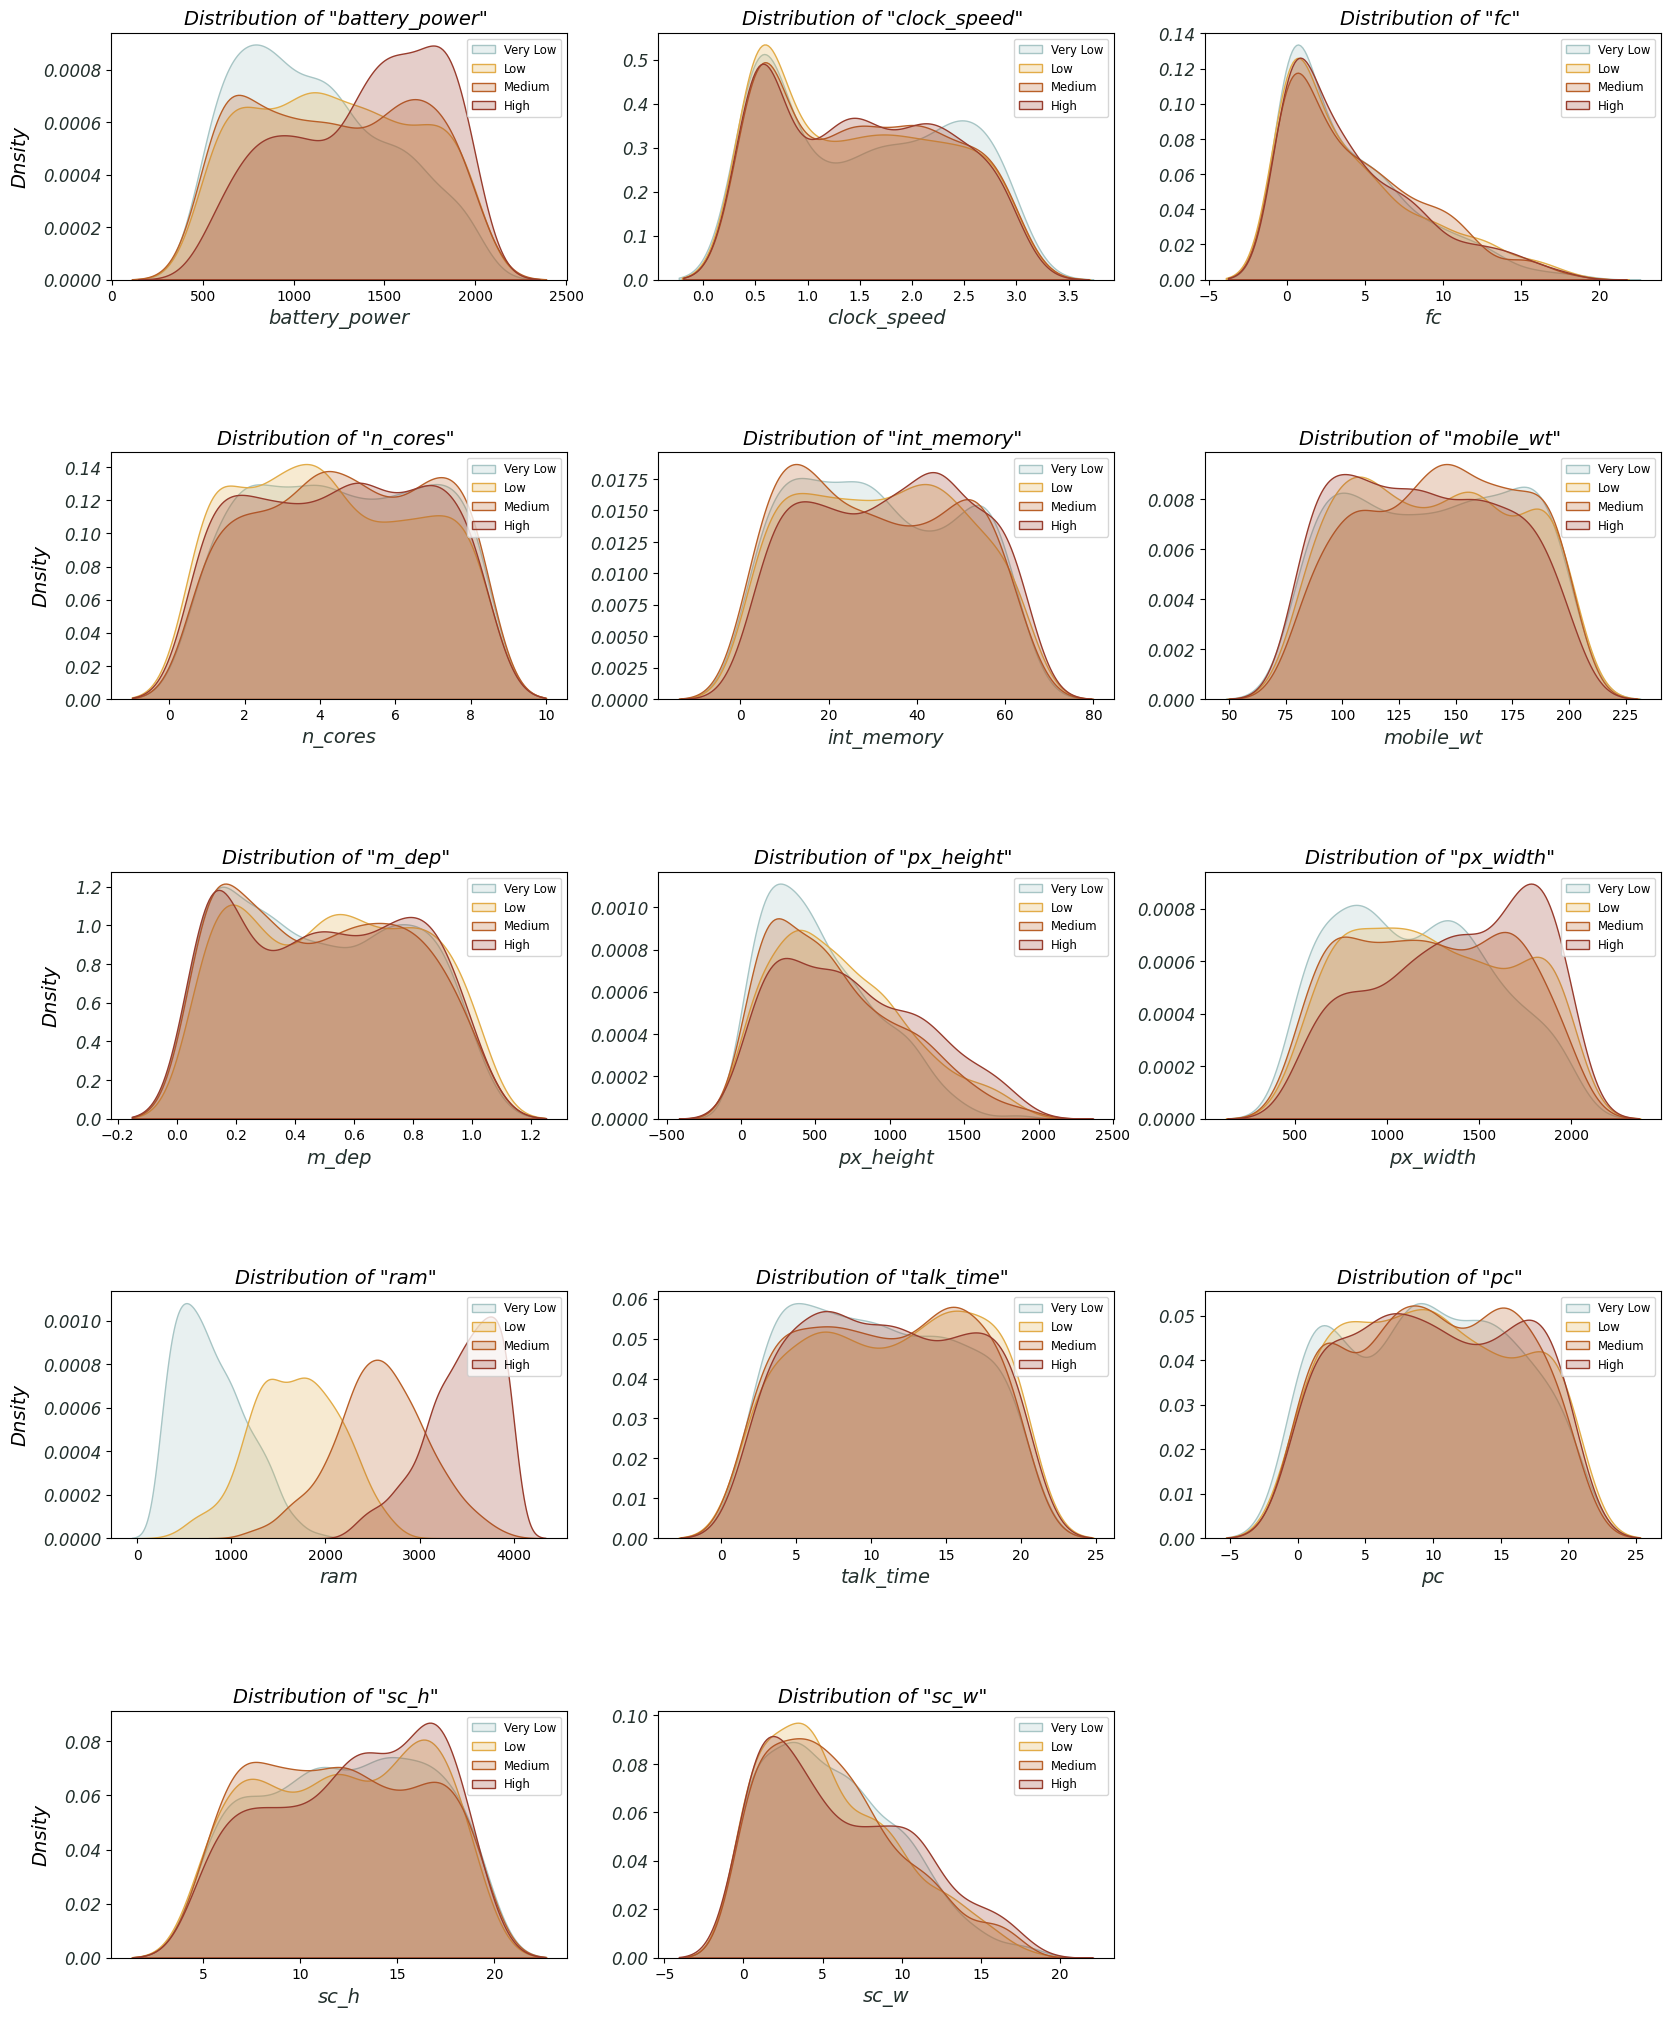

In [17]:
#Checking the distribution and count of continuous columns :

plt.figure(figsize=(25,60))
for n , col in enumerate(continuous) : #a loop to plot histograms of continuous columns

    #plotting histograms
    plt.subplot(14 , 5 , (5*n)+1)
    sns.histplot(df[col] , kde=True , color = '#E2AC48')
    plt.title(f'Count of "{col}"' , fontsize=12, fontstyle = "oblique" )
    plt.xlabel(col , fontsize=12 , fontstyle = "oblique")
    plt.ylabel('Count' , labelpad = 2 , fontsize=10 , fontstyle = "oblique")
    plt.yticks(color = "#23302D" , fontsize=10 , fontstyle = "oblique")

    #plotting histograms considering price_range
    for i , price in enumerate(price_dict):

        plt.subplot(14 , 5 , (n*5)+(i+2))
        sns.histplot(df[df['price_range'] == str(i)][col] , kde = True , color = '#B96028')
        plt.title(f'Count of "{col}" by {price}' , fontsize=12, fontstyle = "oblique" , color = '#780000')
        plt.xlabel('')
        plt.ylabel('')
        plt.yticks(color = "#23302D" , fontsize = 10 , fontstyle = "oblique")

plt.subplots_adjust( hspace=0.5 )
plt.show()

print('-'*33 + 'Distribution Plots' + '-'*33)

#Distribution plots :

plt.figure(figsize=(20,25))
for i , col in enumerate(continuous) : #a loop for ploting the distribution of each feature
    plt.subplot(5,3,i+1)

    #distribution for each price_range
    sns.kdeplot(df[df['price_range'] == '0'][col] , fill = True , color = '#A7C5C5' , label = 'Very Low')
    sns.kdeplot(df[df['price_range'] == '1'][col] ,fill = True , color = '#E2AC48' , label = 'Low')
    sns.kdeplot(df[df['price_range'] == '2'][col] ,fill = True , color = '#B96028' , label = 'Medium')
    sns.kdeplot(df[df['price_range'] == '3'][col] ,fill = True , color = '#983C2D' , label = 'High')

    #for a better visualization
    if i==0 or i==3 or i==6 or i==9 or i==12 or i==15 :
        plt.ylabel('Dnsity' , labelpad = 10 , fontsize=14,fontstyle = "oblique")
    
    else :
         plt.ylabel("")
        
    plt.xlabel(col , color = "#23302D" , fontsize=14, fontstyle = "oblique")    
    plt.title(f'Distribution of "{col}" ' , fontsize=14, fontstyle = "oblique" , color = 'black')
    plt.yticks(color = "#23302D" , fontsize=12,fontstyle = "oblique")
    plt.legend(fontsize='small')
    
plt.subplots_adjust( hspace=0.7 ) 
plt.show()

<Figure size 800x800 with 0 Axes>

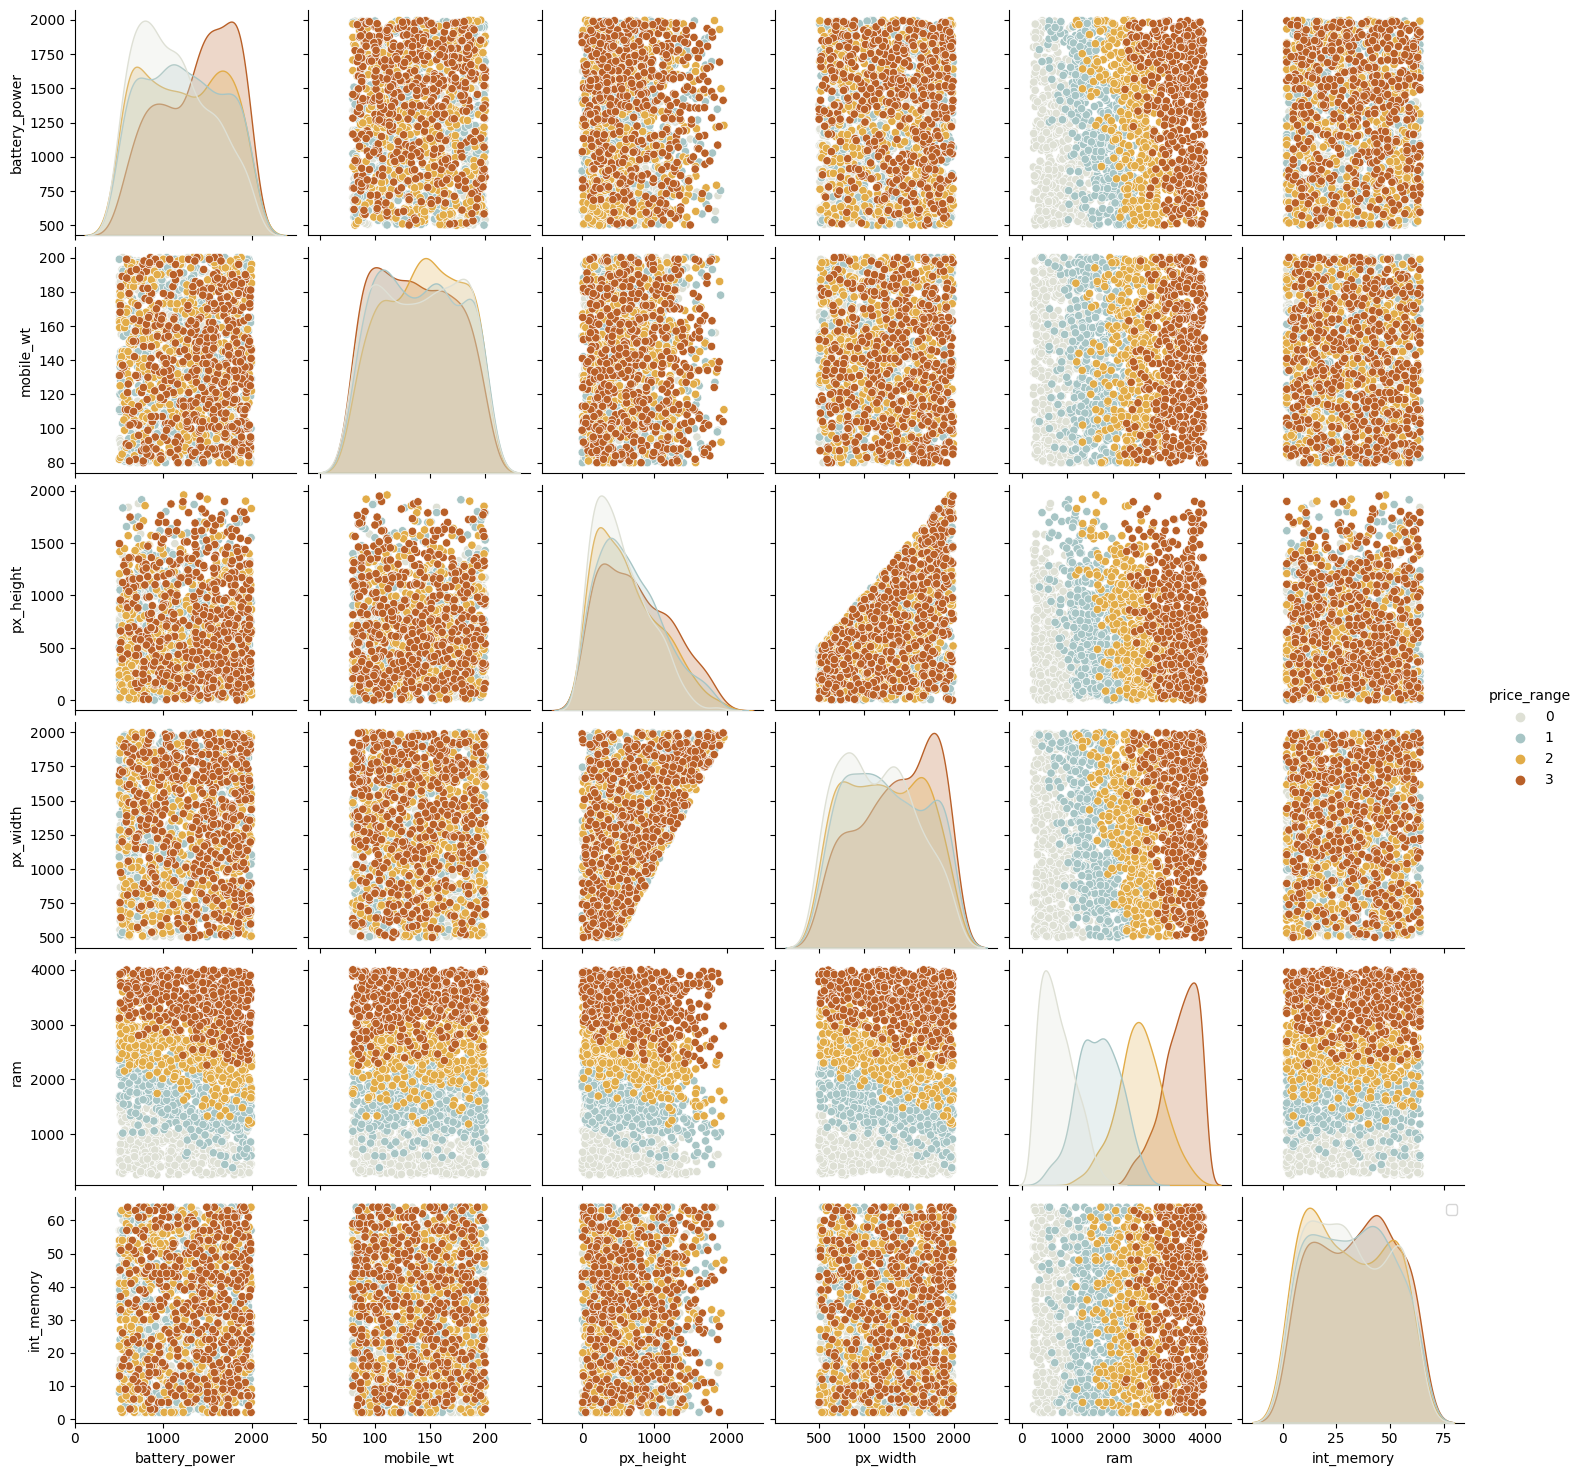

In [18]:
#pair plot with more important features

plt.figure(figsize=(8,8))
sns.pairplot(df[['battery_power' , 'mobile_wt', 'px_height' , 'px_width', 'ram', 'int_memory' , 'price_range']] , hue='price_range' ,
             palette = ['#DEE0D5' ,'#A7C5C5' ,  '#E2AC48' , '#B96028' , '#983C2D'])
plt.legend()
plt.show()

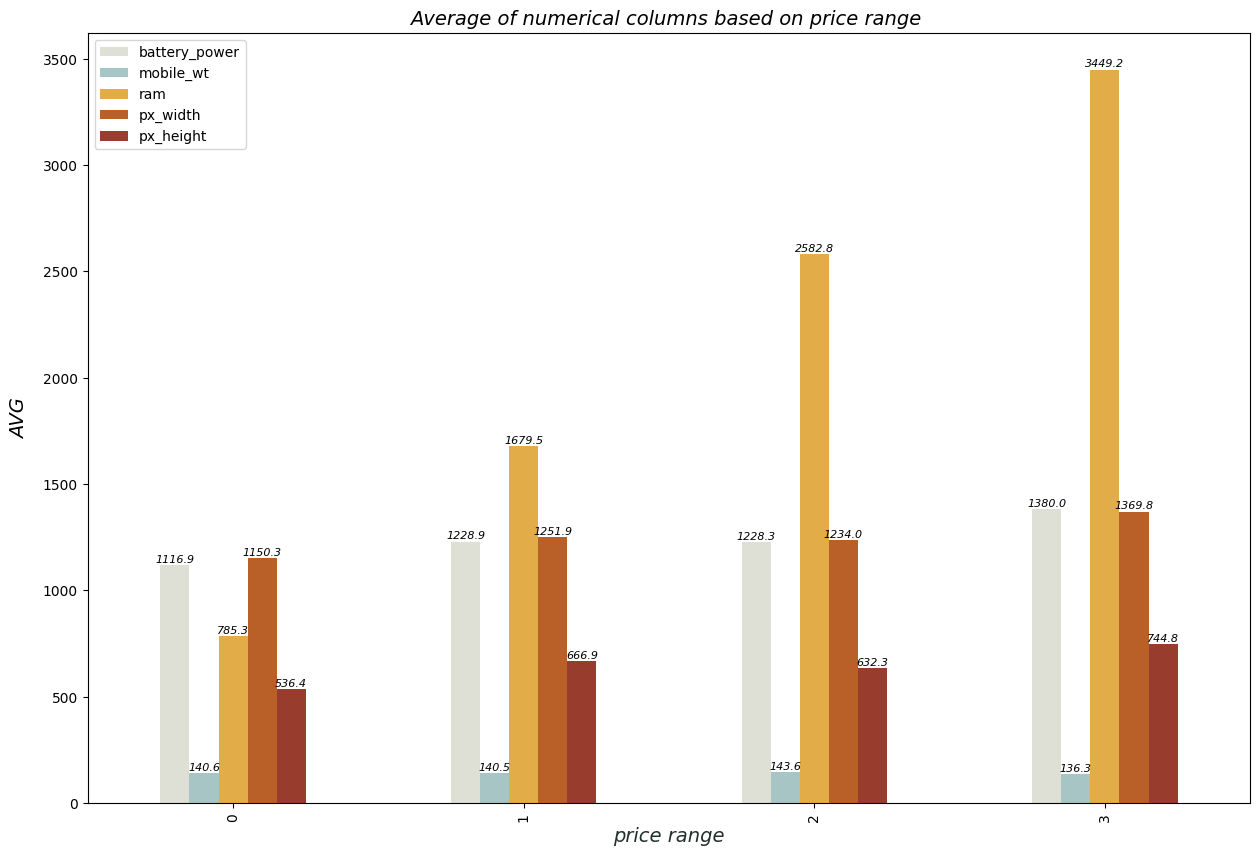

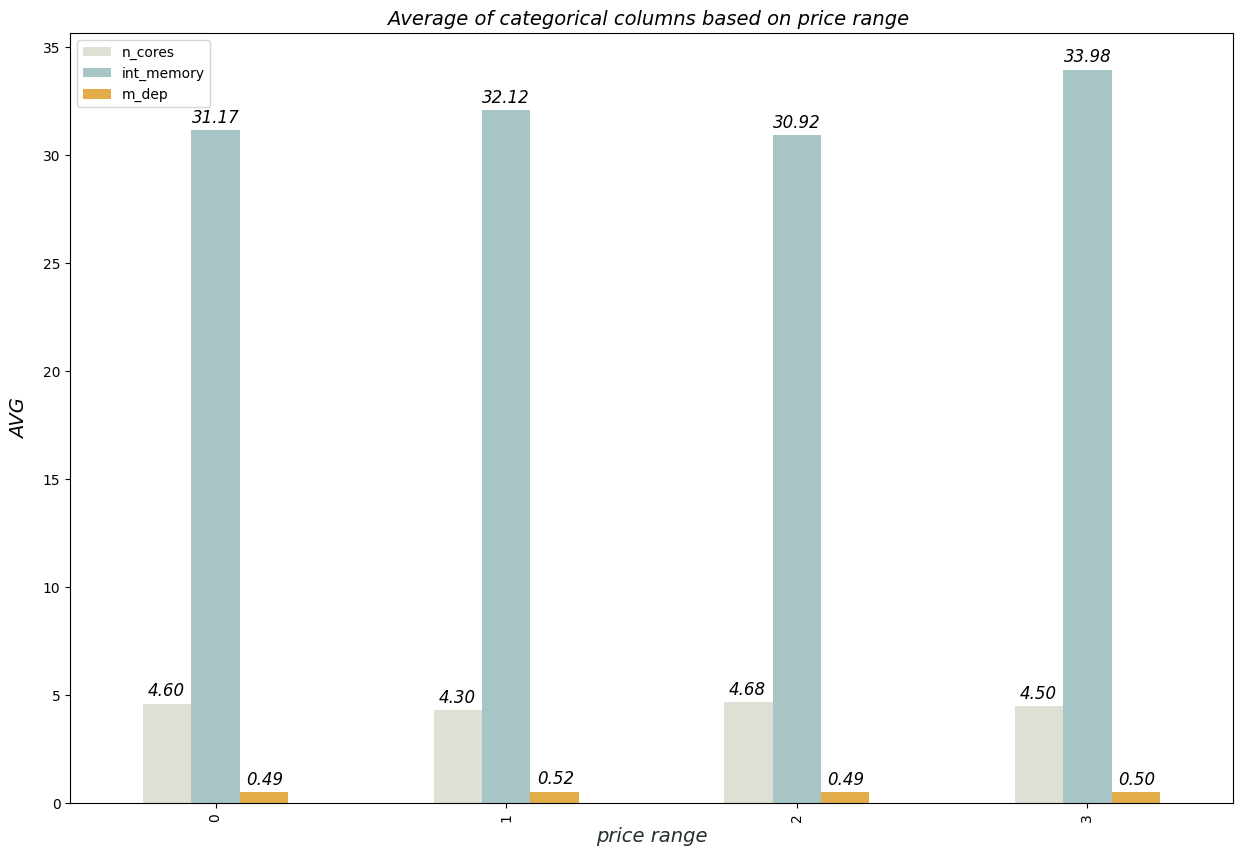

In [19]:
#Avg of numerical columns based on price range :

df_avg = df.groupby('price_range')[['battery_power','mobile_wt', 'ram' , 'px_width' , 'px_height']].mean()
cmap = ['#DEE0D5' ,'#A7C5C5' ,  '#E2AC48' , '#B96028' , '#983C2D']
df_avg.plot(kind='bar', figsize=(15, 10) , color = cmap)
plt.ylabel('AVG' , labelpad = 10 , fontsize=14,fontstyle = "oblique") 
plt.xlabel('price range' , color = "#23302D" , fontsize=14 , fontstyle = "oblique")    
plt.title('Average of numerical columns based on price range ' , fontsize=14, fontstyle = "oblique" , color = 'black')
pading = [ -0.2 , -0.1 , 0, 0.1 , 0.2 , -0.2 , -0.1 , 0, 0.1 , 0.2 , -0.2 , -0.1 , 0, 0.1 , 0.2 , -0.2 , -0.1 , 0, 0.1 , 0.2]

for i , v in enumerate(df_avg.values.flatten()):
    
    plt.text( (i//5)+pading[i]  , v+50 , format(v, '.1f') , ha='center', va='top', fontstyle = "oblique" , fontsize = 8 )  
plt.show()

print('\n' *2)

#Avg of categorical columns base on price range :

df_avg = df.groupby('price_range')[['n_cores' , 'int_memory' , 'm_dep' ]].mean() #Mean of each column

df_avg.plot(kind='bar', figsize=(15, 10) , color = cmap) #Plotting
plt.ylabel('AVG' , labelpad = 10 , fontsize=14,fontstyle = "oblique") 
plt.xlabel('price range' , color = "#23302D" , fontsize=14 , fontstyle = "oblique")
plt.title('Average of categorical columns based on price range ' , fontsize=14, fontstyle = "oblique" , color = 'black')

pading = [-0.17 , 0, 0.17 , -0.17 , 0, 0.17 , -0.17 , 0, 0.17 , -0.17 , 0, 0.17 ]
for i , v in enumerate(df_avg.values.flatten()):
    plt.text( (i//3)+pading[i]  , v+1 , format(v, '.2f') , ha='center', va='top', fontstyle = "oblique" , fontsize = 12 )  

plt.show()

In [20]:
pd.set_option('display.max_colwidth', None)

In [21]:
#normalizing features

features = ['battery_power' ,'blue', 'clock_speed' ,'dual_sim' , 'fc' , 'four_g', 'int_memory' ,  'm_dep' ,'mobile_wt'  , 'n_cores' , 'pc', 
            'px_height' , 'px_width' , 'ram' ,'sc_h' , 'sc_w' ,'talk_time' ,'three_g' , 'touch_screen' , 'wifi']
scaler = MinMaxScaler(feature_range = (1,2))
norm = scaler.fit_transform(df[features]) #Normalizing
df_norm = pd.DataFrame(norm , columns = features) #Convert it into dataframe
df_norm.describe().T

count      mean       std  min       25%       50%       75%  \
battery_power  2000.0  1.492664  0.293533  1.0  1.234302  1.484302  1.744322   
blue           2000.0  1.495000  0.500100  1.0  1.000000  1.000000  2.000000   
clock_speed    2000.0  1.408900  0.326402  1.0  1.080000  1.400000  1.680000   
dual_sim       2000.0  1.509500  0.500035  1.0  1.000000  2.000000  2.000000   
fc             2000.0  1.226816  0.228497  1.0  1.052632  1.157895  1.368421   
four_g         2000.0  1.521500  0.499662  1.0  1.000000  2.000000  2.000000   
int_memory     2000.0  1.484621  0.292673  1.0  1.225806  1.483871  1.741935   
m_dep          2000.0  1.446389  0.320462  1.0  1.111111  1.444444  1.777778   
mobile_wt      2000.0  1.502075  0.294997  1.0  1.241667  1.508333  1.750000   
n_cores        2000.0  1.502929  0.326834  1.0  1.285714  1.428571  1.857143   
pc             2000.0  1.495825  0.303216  1.0  1.250000  1.500000  1.750000   
px_height      2000.0  1.329137  0.226419  1.0  1.144260  1.287755  1.483291   
px_width       2000.0  1.501679  0.288518  1.0  1.250167  1.498665  1.756342   
ram            2000.0  1.499255  0.289880  1.0  1.254276  1.505211  1.750534   
sc_h           2000.0  1.521893  0.300946  1.0  1.285714  1.500000  1.785714   
sc_w           2000.0  1.320389  0.242022  1.0  1.111111  1.277778  1.500000   
talk_time      2000.0  1.500611  0.303553  1.0  1.222222  1.500000  1.777778   
three_g        2000.0  1.761500  0.426273  1.0  2.000000  2.000000  2.000000   
touch_screen   2000.0  1.503000  0.500116  1.0  1.000000  2.000000  2.000000   
wifi           2000.0  1.507000  0.500076  1.0  1.000000  2.000000  2.000000   

               max  
battery_power  2.0  
blue           2.0  
clock_speed    2.0  
dual_sim       2.0  
fc             2.0  
four_g         2.0  
int_memory     2.0  
m_dep          2.0  
mobile_wt      2.0  
n_cores        2.0  
pc             2.0  
px_height      2.0  
px_width       2.0  
ram            2.0  
sc_h           2.0  
sc_w           2.0  
talk_time      2.0  
three_g        2.0  
touch_screen   2.0  
wifi           2.0

In [22]:
#Seperating X and Y
x = df_norm
y = df['price_range'].values.reshape(-1, 1)
y = y.astype('int')

In [23]:
#Testing different train data proportion
def Split_size(x , y , Model):
    
    test_size = [0.1 , 0.15 , 0.2 , 0.25 , 0.3 , 0.35]
    score = []
    for size in test_size:
        
        X_train, X_test, y_train, y_test = train_test_split (x, y, test_size = size, random_state = 0)
        if Model=='DTC' :
            classifier = DecisionTreeClassifier(max_depth = 7 , random_state = 0) #Creating model with the best parametere
        elif Model=='RFC':
            classifier = RandomForestClassifier(n_estimators = 100 , max_depth = 7 , random_state = 0) #Creating model with the best parametere
        else :
            classifier = SVC() #Creating model with the best parametere
        
        classifier.fit (X_train, y_train)
        score.append (classifier.score(X_test, y_test))
        
    Scores = pd.DataFrame({'Test size': test_size, 'Score': score})
    Scores.sort_values(by = ['Score'] , ascending = False, inplace = True)
    display(Scores)

In [24]:
def fit_evaluate(Model , x_train , y_train , x_test , y_test, param):
    
    #Creating a model based on the best hyper parameter :
    if Model=='DTC' :
        classifier = DecisionTreeClassifier(**param) #Creating model with the best parametere
    elif Model=='RFC':
        param['min_samples_leaf'] = 10
        classifier = RandomForestClassifier(**param) #Creating model with the best parametere
    else :
        classifier = SVC(**param) #Creating model with the best parametere
        

    classifier.fit (x_train , y_train.ravel()) # fiting the model
    y_pred = classifier.predict (x_test) # predicting
    y_pred_train = classifier.predict (x_train)

    #Evaluating with different metrics :
    print ("\033[31mTrain Accuracy: " , metrics.accuracy_score (y_train , y_pred_train))
    print ("Test Accuracy: " , metrics.accuracy_score (y_test , y_pred))
    print ("F1 Score: ", f1_score (y_test , y_pred , average = "macro"))
    print ("Precision Score: ", precision_score (y_test , y_pred , average = "macro" ))
    print ("Recall Score: ", recall_score (y_test , y_pred , average = "macro" )) 
    print ('\n\33[33m',classification_report (y_test , y_pred))

    #plotting confusion matrix
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred))
    cm_display.plot(colorbar=False, cmap = 'Oranges')
    plt.title('Confusion Matrix')
    plt.show()

    


In [25]:
def GSCV(Model , model , grid , x , y , test_size):

    x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = test_size , random_state = 0) #spliting data
    
    grid_search = GridSearchCV (estimator = model , param_grid = grid , n_jobs = -1 , cv = 5 , 
                            scoring = ['accuracy', 'recall_macro' , 'precision_macro' , 'f1_macro'],
                            error_score = 0 , refit = 'accuracy')  #Defining grid search
    
    grid_search.fit (x_train , y_train) #Fitting grid search

    results = grid_search.cv_results_ #Getting the result
    df_results = pd.DataFrame(results) #Turning the result into a DF

    param = grid_search.best_params_ #getting the best params

    columns_result = ['params' , 'rank_test_accuracy' , 'mean_test_accuracy' ,  'mean_test_f1_macro' ,
                      'mean_test_precision_macro' , 'mean_test_recall_macro' ] #Desired column out of dataframe
    
    df_results = df_results[columns_result] #Filtering the result
    df_results = df_results.sort_values(by = 'rank_test_accuracy') #Sorting based on refitted metric
    
    params ={}
    for arg in param : #creating the param kwarg to pass it to 'fit_evaluate' function
        key = arg.split('classifier__')
        params[key[1]] = param[arg]
    params['random_state'] = 0 #adding random_state
    

    display(df_results.head(10).style.highlight_max(color = '#fca311', axis = 0 , subset = df_results.columns[3:])) #highlighting best results


    fit_evaluate(Model , x_train , y_train , x_test , y_test , params) #Evaluationg Model

   
    


In [26]:
Split_size(x,y,'DTC') #Testing Different Test size


Test size     Score
1       0.15  0.890000
0       0.10  0.880000
2       0.20  0.875000
5       0.35  0.857143
3       0.25  0.852000
4       0.30  0.845000

Train Accuracy:  1.0
Test Accuracy:  0.8766666666666667
F1 Score:  0.8745926802570565
Precision Score:  0.8754919811444347
Recall Score:  0.8746796731111536

               precision    recall  f1-score   support

           0       0.91      0.95      0.93        78
           1       0.83      0.84      0.83        74
           2       0.80      0.83      0.81        69
           3       0.96      0.89      0.92        79

    accuracy                           0.88       300
   macro avg       0.88      0.87      0.87       300
weighted avg       0.88      0.88      0.88       300



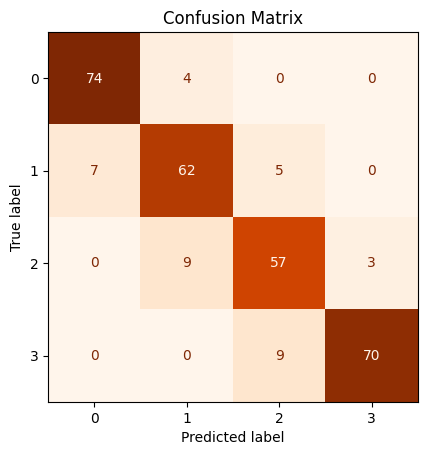

In [27]:
#Defining a model pipeline withh different parameters
    
model = Pipeline([
        ('classifier', DecisionTreeClassifier()) 
])

grid_params = { 'classifier__criterion' : ['gini' , 'entropy' , 'log_loss'],
               'classifier__max_depth' : [3,5,7,9,11,13,15,17,19]
              }


df_GS = GSCV('DTC' , model , grid_params , x , y  , 0.15) #Performing grid search cv and evaluating model using the best fit

In [28]:
#Creating and pruning the best model

DT = DecisionTreeClassifier( criterion = 'entropy' , max_depth = 9 , random_state = 0) #Best model from GridSearch CV
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.15 , random_state = 0) #spliting data
path = DT.cost_complexity_pruning_path(x_train , y_train)
ccp_alphas = path.ccp_alphas #Caculating ccps

ccp_alphas = ccp_alphas[:-1] #Droping last value because the tree result will be just the root

In [29]:
#Finding the best cost-complexity alpha

train_accuracy = []
test_accuracy = []

for ccp in ccp_alphas : #fitting different ccp on model and also caculating its test and train accuracy
    
    DT = DecisionTreeClassifier( criterion = 'entropy' , max_depth = 9 , random_state = 0 , ccp_alpha = ccp)
    DT.fit(x_train , y_train) #fitting
    
    train_accuracy.append(DT.score(x_train , y_train))
    test_accuracy.append(DT.score(x_test , y_test)) #caculating score


#plotting
fig = go.Figure()
fig.add_trace(go.Scatter(x=ccp_alphas, y=train_accuracy,
                    mode='lines+markers',
                    name='Train Accuracy',
                        line = dict(color='#E2AC48' , width=2)))
fig.add_trace(go.Scatter(x=ccp_alphas, y=test_accuracy,
                    mode='lines+markers',
                    name='Test Accuracy',
                        line = dict(color='#983C2D' , width=2)))
fig.update_layout(
    title='Train Accuracy vs Test Accuracy With Different CCPs',
    xaxis_title='Accuracy',
    yaxis_title='CCP',
    width=1000, 
    height=600,
    plot_bgcolor='#DEE0D5'
)
cmap = ['#DEE0D5' ,'#A7C5C5' ,  '#E2AC48' , '#B96028' , ]
fig.show()
                          
    
    
    

In [30]:
#Finding the best cost-complexity alpha
train_accuracy = []
test_accuracy = []
ccp_alphas = ccp_alphas[ccp_alphas < 0.04] #going in more depth



for ccp in ccp_alphas : #fitting different ccp on model and also caculating its test and train accuracy
    
    DT = DecisionTreeClassifier( criterion = 'entropy' , max_depth = 9 , random_state = 0 , ccp_alpha = ccp)
    DT.fit(x_train , y_train) #fitting
    
    train_accuracy.append(DT.score(x_train , y_train))
    test_accuracy.append(DT.score(x_test , y_test)) #caculating score
    
#plotting
fig = go.Figure()
fig.add_trace(go.Scatter(x=ccp_alphas, y=train_accuracy,
                    mode='lines+markers',
                    name='Train Accuracy',
                        line = dict(color='#E2AC48' , width=2)))
fig.add_trace(go.Scatter(x=ccp_alphas, y=test_accuracy,
                    mode='lines+markers',
                    name='Test Accuracy',
                         hovertext = train_accuracy,
                         hovertemplate='X: %{x}<br>Y: %{y}<br>Train Accuracy: %{hovertext}<extra></extra>',
                        line = dict(color='#983C2D' , width=2)))
fig.update_layout(
    title='Train Accuracy vs Test Accuracy With Different CCPs',
    xaxis_title='Accuracy',
    yaxis_title='CCP',
    width=1000, 
    height=600,
    plot_bgcolor='#DEE0D5'
)
cmap = ['#DEE0D5' ,'#A7C5C5' ,  '#E2AC48' , '#B96028' , ]
fig.show()

Train Accuracy:  0.9711764705882353
Test Accuracy:  0.8733333333333333
F1 Score:  0.8712652057601772
Precision Score:  0.8720725577175348
Recall Score:  0.8715151161491284

               precision    recall  f1-score   support

           0       0.91      0.95      0.93        78
           1       0.84      0.84      0.84        74
           2       0.79      0.83      0.81        69
           3       0.95      0.87      0.91        79

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.88      0.87      0.87       300



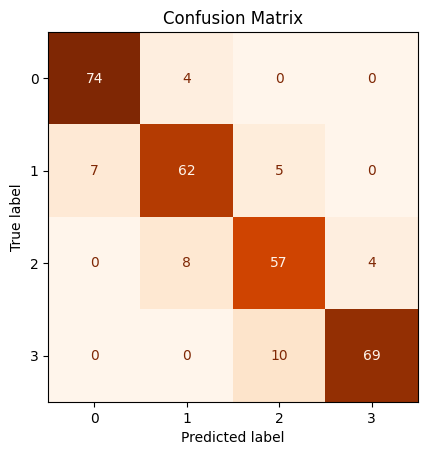

In [31]:
#Best model using ccp alpha
DT = DecisionTreeClassifier( criterion = 'entropy' , max_depth = 9 , random_state = 0 , ccp_alpha = 0.003241044 )
DT.fit(x_train , y_train) #fitting
y_pred = DT.predict (x_test) # predicting
y_pred_train = DT.predict(x_train)
#Evaluating with different metrics :
print ("\033[31mTrain Accuracy: " , metrics.accuracy_score (y_train , y_pred_train))
print ("Test Accuracy: " , metrics.accuracy_score (y_test , y_pred))
print ("F1 Score: ", f1_score (y_test , y_pred , average = "macro"))
print ("Precision Score: ", precision_score (y_test , y_pred , average = "macro" ))
print ("Recall Score: ", recall_score (y_test , y_pred , average = "macro" )) 
print ('\n\33[33m',classification_report (y_test , y_pred))

#plotting confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred))
cm_display.plot(colorbar=False, cmap = 'Oranges')
plt.title('Confusion Matrix')
plt.show()

In [32]:
Split_size(x, y , 'RFC') #Choosing the best test_size

Test size     Score
2       0.20  0.870000
5       0.35  0.865714
1       0.15  0.863333
4       0.30  0.848333
0       0.10  0.845000
3       0.25  0.842000

Train Accuracy:  0.9625
Test Accuracy:  0.875
F1 Score:  0.871788978627907
Precision Score:  0.8718345595678143
Recall Score:  0.8724954648012283

               precision    recall  f1-score   support

           0       0.93      0.98      0.95       107
           1       0.81      0.82      0.81        93
           2       0.82      0.77      0.80       101
           3       0.93      0.92      0.92        99

    accuracy                           0.88       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.88      0.87       400



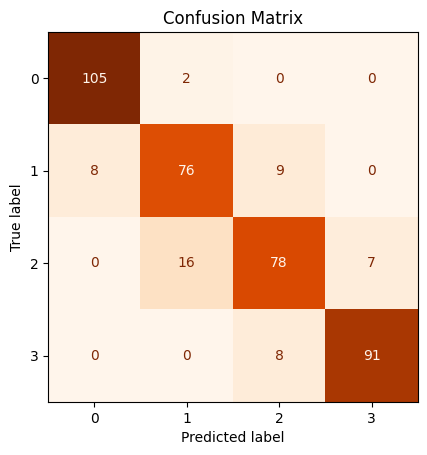

In [33]:
#Defining a model pipeline withh different parameters
    
model = Pipeline([
        ('classifier', RandomForestClassifier(min_samples_leaf = 10))
])
grid_params = { 'classifier__criterion' : ['gini' , 'entropy' , 'log_loss'],
               'classifier__max_depth' : [3,5,7,9,10,11,12],
               'classifier__n_estimators' : [50 , 100 , 250 , 500]
              }

df_GS = GSCV('RFC' , model , grid_params , x , y.ravel() , 0.2 ) #Performing grid search cv and evaluating model using the best fit


In [34]:
Split_size(x, y , 'SVC') #Choosing the best test_size

Test size     Score
0       0.10  0.890000
2       0.20  0.877500
1       0.15  0.866667
3       0.25  0.840000
4       0.30  0.833333
5       0.35  0.831429

Train Accuracy:  0.9875
Test Accuracy:  0.96
F1 Score:  0.9594563647971014
Precision Score:  0.9596908811833913
Recall Score:  0.9592701959372905

               precision    recall  f1-score   support

           0       0.98      0.99      0.99       107
           1       0.96      0.95      0.95        93
           2       0.93      0.94      0.94       101
           3       0.97      0.96      0.96        99

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



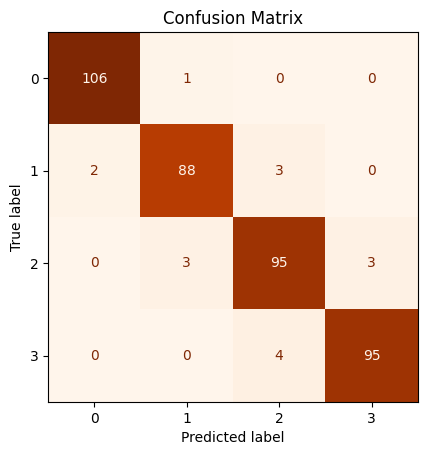

In [35]:
#Defining a model pipeline withh different parameters
    
model = Pipeline([
        ('classifier', SVC())
])
grid_params = { 'classifier__C' : [0.1 , 1 , 10 , 100],
               'classifier__gamma' : [1 , 0.1 , 0.01 , 0.001 , 'auto' , 'scaled' ],
               'classifier__kernel' : ['poly' , 'rbf' , 'sigmoid' , 'linear'],
               'classifier__decision_function_shape' : [ 'ovo' , 'ovr']
               
              }

df_GS = GSCV('SVC' , model , grid_params , x , y.ravel() , 0.2 ) #Performing grid search cv and evaluating model using the best fit
